# 22. Standard AutoEncoder

In [1]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim

import torchvision
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 22.1 Preparing MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Processing...
Done!


In [4]:
batch_size = 100

train_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                         batch_size=1,
                                         shuffle=False)

In [5]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

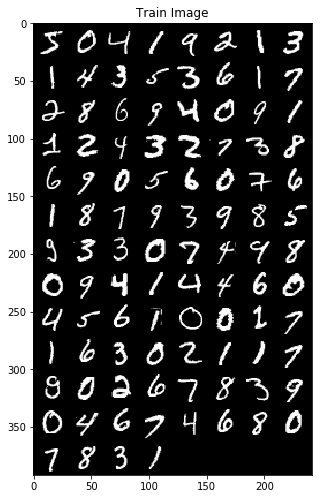

In [6]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

## 22.2 Define Model

In [7]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Linear(28*28,28)
        self.decoder = nn.Linear(28,28*28)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        z = self.encoder(x)
        
        out = self.decoder(z)
        out = out.view(-1,1,28,28)
        
        return out

In [8]:
model = AE().cuda()

## 22.3 Model Training

In [9]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        
        recon_X = model(X)
        cost = loss(recon_X, X)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600], Loss: 0.0567
Epoch [1/5], lter [200/600], Loss: 0.0528
Epoch [1/5], lter [300/600], Loss: 0.0343
Epoch [1/5], lter [400/600], Loss: 0.0305
Epoch [1/5], lter [500/600], Loss: 0.0293
Epoch [1/5], lter [600/600], Loss: 0.0291
Epoch [2/5], lter [100/600], Loss: 0.0251
Epoch [2/5], lter [200/600], Loss: 0.0293
Epoch [2/5], lter [300/600], Loss: 0.0230
Epoch [2/5], lter [400/600], Loss: 0.0213
Epoch [2/5], lter [500/600], Loss: 0.0220
Epoch [2/5], lter [600/600], Loss: 0.0234
Epoch [3/5], lter [100/600], Loss: 0.0211
Epoch [3/5], lter [200/600], Loss: 0.0255
Epoch [3/5], lter [300/600], Loss: 0.0204
Epoch [3/5], lter [400/600], Loss: 0.0196
Epoch [3/5], lter [500/600], Loss: 0.0206
Epoch [3/5], lter [600/600], Loss: 0.0222
Epoch [4/5], lter [100/600], Loss: 0.0201
Epoch [4/5], lter [200/600], Loss: 0.0246
Epoch [4/5], lter [300/600], Loss: 0.0200
Epoch [4/5], lter [400/600], Loss: 0.0192
Epoch [4/5], lter [500/600], Loss: 0.0201
Epoch [4/5], lter [600/600], Loss:

## 22.4 Test Model

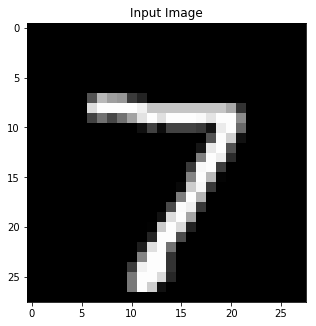

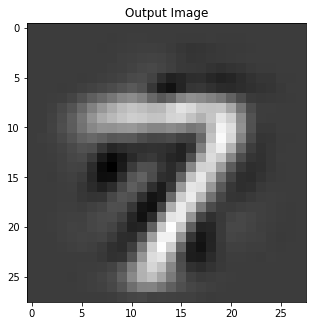

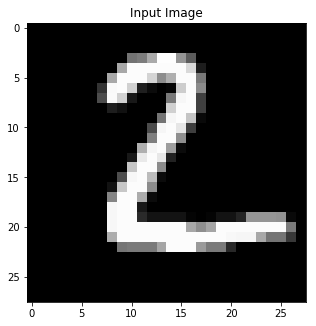

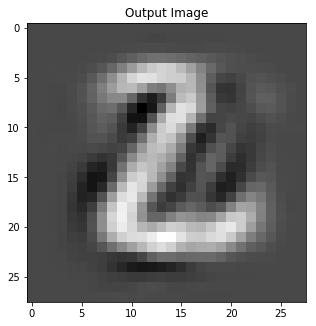

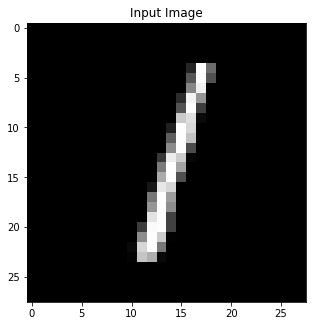

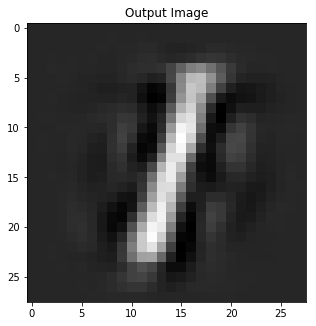

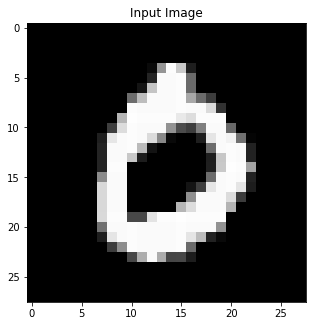

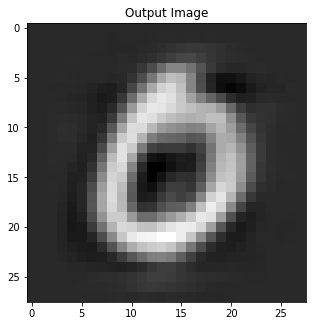

In [12]:
model.eval()

for n, (images, labels) in enumerate(mnist_test):
    
    imshow(torchvision.utils.make_grid(images, normalize=True), "Input Image")
    images  = images.view(-1, 28 * 28).cuda()
    
    outputs = model(images)
    outputs = outputs.view(-1, 28, 28)
    
    imshow(torchvision.utils.make_grid(outputs.data.cpu(), normalize=True), "Output Image")
    
    if n > 2 : break